In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('airbnb_listing_train.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,NaN,De Baarsjes - Oud-West,52.37194,4.84965,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,NaN,IJburg - Zeeburgereiland,52.36263,4.98031,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,NaN,De Pijp - Rivierenbuurt,52.35719,4.90009,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,NaN,Zuid,52.34855,4.85105,Entire home/apt,2,11,28-04-2019,0.37,1,0,136


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [4]:
df.describe(())

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,1.290100e+04,0.0,12901.000000,12901.000000,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,1.984923e+07,6.321700e+07,NaN,52.365313,4.889744,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,8.010814e+07,NaN,0.016418,0.036016,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,3.592000e+03,NaN,52.289270,4.755720,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
50%,1.874939e+07,2.711601e+07,NaN,52.364570,4.887130,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
max,4.370900e+07,3.490175e+08,NaN,52.425090,5.018400,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [5]:
df['avg_reviews_per_month'] = df['number_of_reviews'] / df['reviews_per_month']
df['avg_reviews_per_month'].fillna(0,inplace = True)

In [6]:
df = pd.get_dummies(data = df,columns=['room_type'], prefix='room_type', drop_first=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['neighbourhood'] = encoder.fit_transform(df['neighbourhood'])

In [8]:
df.drop(['id','name','host_name','last_review','reviews_per_month','number_of_reviews','neighbourhood_group'],axis = 1,inplace = True)

In [9]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         12901 non-null  Int64  
 1   neighbourhood                   12901 non-null  Int32  
 2   latitude                        12901 non-null  Float64
 3   longitude                       12901 non-null  Float64
 4   minimum_nights                  12901 non-null  Int64  
 5   calculated_host_listings_count  12901 non-null  Int64  
 6   availability_365                12901 non-null  Int64  
 7   price                           12901 non-null  Int64  
 8   avg_reviews_per_month           12901 non-null  Float64
 9   room_type_Hotel room            12901 non-null  UInt8  
 10  room_type_Private room          12901 non-null  UInt8  
 11  room_type_Shared room           12901 non-null  UInt8  
dtypes: Float64(3), Int32(1), Int64(5

In [10]:
df.head()

,host_id,neighbourhood,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365,price,avg_reviews_per_month,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3123809,8,52.35368,4.90177,3,1,0,220,48.148148,0,0,0
1,10259430,17,52.35728,4.92052,4,1,0,110,48.275862,0,0,0
2,224969266,5,52.37582,4.8985,2,1,7,100,5.454545,0,0,0
3,693472,20,52.37792,4.873,3,1,0,130,58.333333,0,0,0
4,41888346,20,52.38051,4.87493,2,1,24,90,22.139303,0,1,0


In [11]:
df.corr()['price'].sort_values(ascending = False)

price                             1.000000
availability_365                  0.153993
host_id                           0.084512
calculated_host_listings_count    0.057314
room_type_Hotel room              0.045033
minimum_nights                    0.026569
latitude                          0.017697
longitude                         0.016718
room_type_Shared room             0.005600
neighbourhood                    -0.034531
avg_reviews_per_month            -0.066334
room_type_Private room           -0.072324
Name: price, dtype: float64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

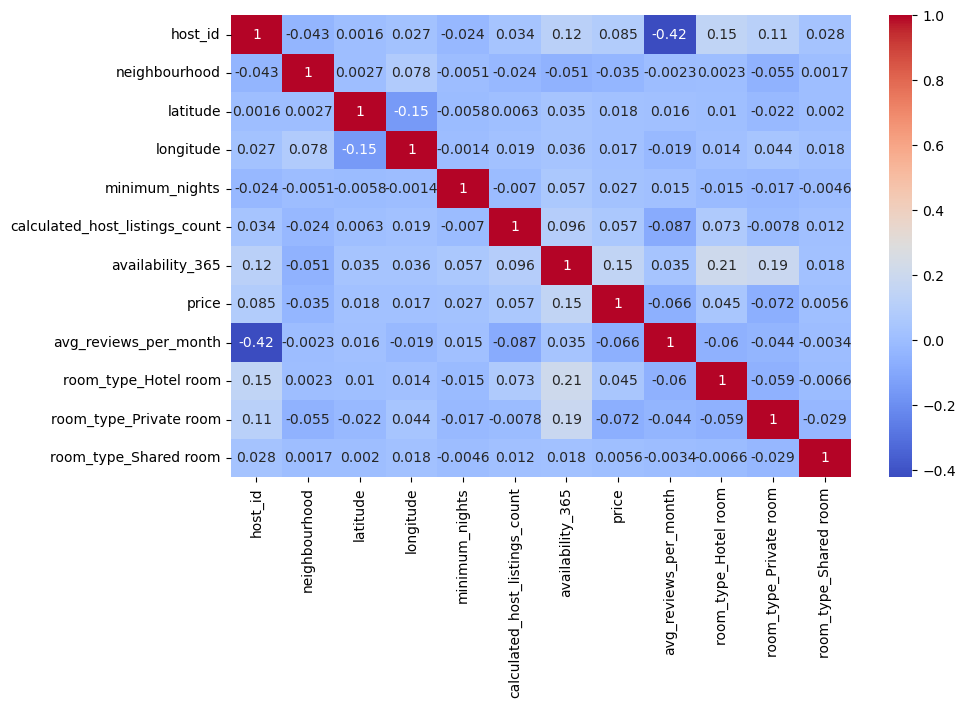

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'avg_reviews_per_month'}>],
       [<Axes: title={'center': 'room_type_Hotel room'}>,
        <Axes: title={'center': 'room_type_Private room'}>,
        <Axes: title={'center': 'room_type_Shared room'}>]], dtype=object)

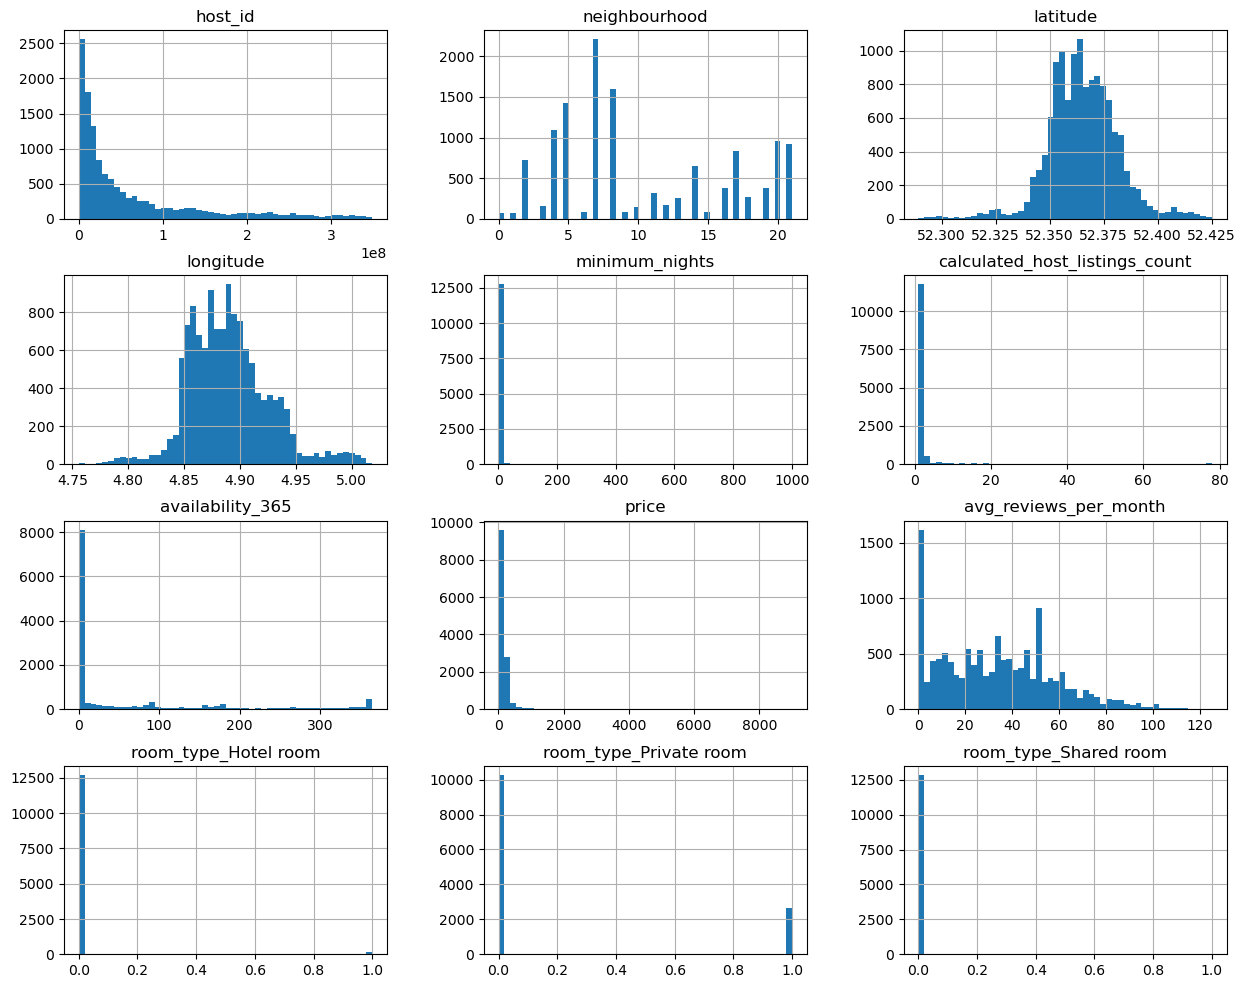

In [14]:
df.hist(bins = 50, figsize= (15,12))

In [15]:
df.columns

Index(['host_id', 'neighbourhood', 'latitude', 'longitude', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365', 'price',
       'avg_reviews_per_month', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

C:\Users\VIVEK\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\VIVEK\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
C:\Users\VIVEK\anaconda3\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\VIVEK\anaconda3\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.In

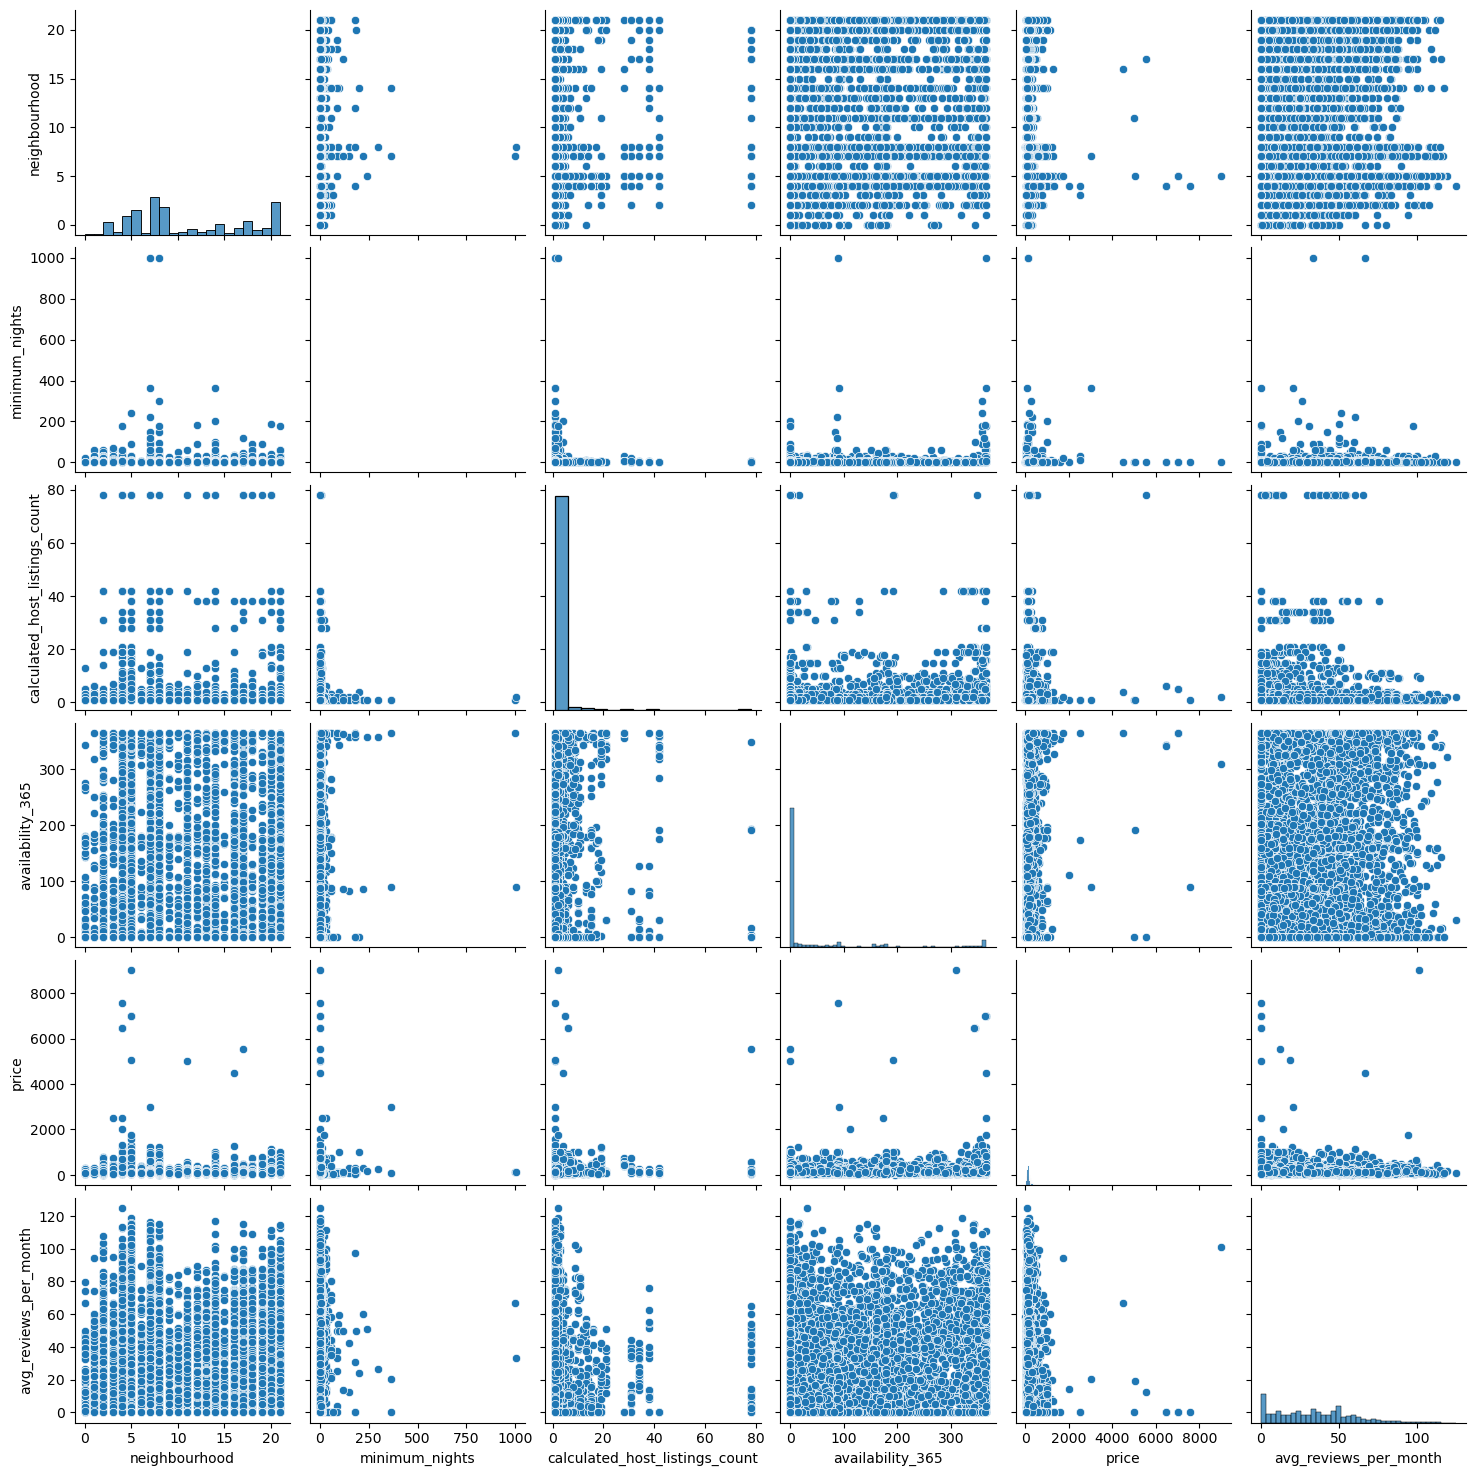

In [16]:
sns.pairplot(df,x_vars = ['neighbourhood','minimum_nights','calculated_host_listings_count', 'availability_365', 'price','avg_reviews_per_month']
             ,y_vars = ['neighbourhood', 'minimum_nights','calculated_host_listings_count', 'availability_365', 'price','avg_reviews_per_month'])

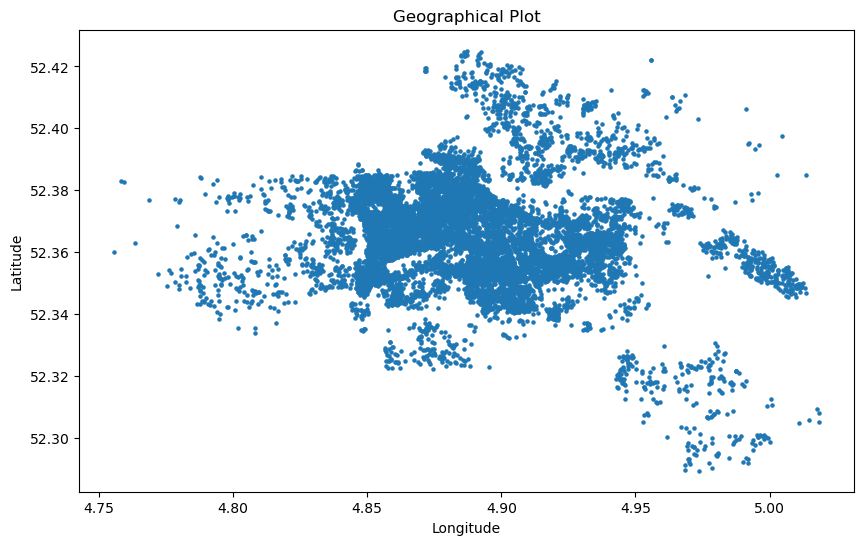

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Plot')
plt.show()


In [18]:
x = df.drop(['price'],axis = 1)
y = df['price']

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn. metrics import mean_squared_error

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

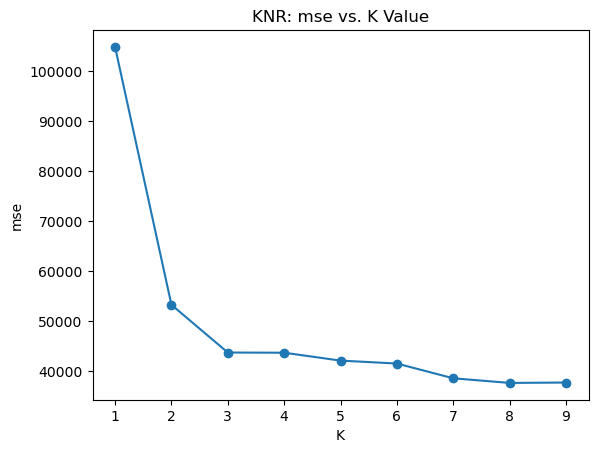

In [23]:
k_vals= []
mse = []
k_rng = range(1,10)
for k in k_rng:
    KNC = KNeighborsRegressor(n_neighbors=k)
    KNC.fit(x_train,y_train)
    pred = KNC.predict(x_test)
    error = mean_squared_error(y_test,pred)
    k_vals.append(k)
    mse.append(error)

# graph
plt.plot(k_vals, mse, marker='o')
plt.xlabel('K')
plt.ylabel('mse')
plt.title('KNR: mse vs. K Value')
plt.show()

In [24]:
knr = KNeighborsRegressor(n_neighbors=8)
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
y_pred1 = lr.predict(x_test)
y_pred2 = knr.predict(x_test)
y_pred3 = dtr.predict(x_test)

In [27]:
print('linear_mse :', mean_squared_error(y_test,y_pred1))
print('knr_mse :',mean_squared_error(y_test,y_pred2))
print('decisiontree_mse :',mean_squared_error(y_test,y_pred3))

linear_mse : 47541.86495781903
knr_mse : 37714.70847055405
decisiontree_mse : 57915.769856644714


KNeighborsRegressor is best model